In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the dataset 
titanic = pd.read_csv('Titanic.csv')

In [5]:
# preview the data set 
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# checking for missing data
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

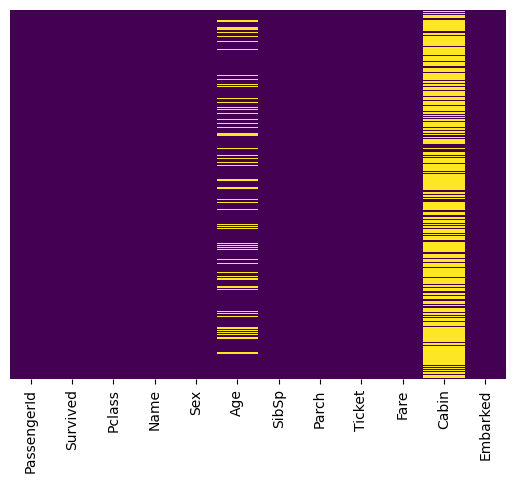

In [11]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Pclass', ylabel='Age'>

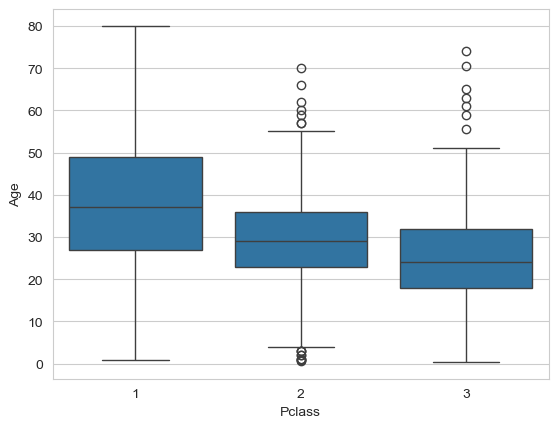

In [13]:
# handling missing data
sns.set_style('whitegrid')
sns.boxplot(x='Pclass',y='Age',data=titanic)

In [15]:
def inpute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
      if Pclass==1:
        return 37
      elif Pclass==2:
       return 29
      else:
       return 24
    else:
      return Age

In [17]:
titanic['Age']=titanic[['Age','Pclass']].apply(inpute_age,axis=1)

C:\Users\hp\AppData\Local\Temp\ipykernel_24728\3730458631.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=cols[0]
C:\Users\hp\AppData\Local\Temp\ipykernel_24728\3730458631.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=cols[1]


<Axes: >

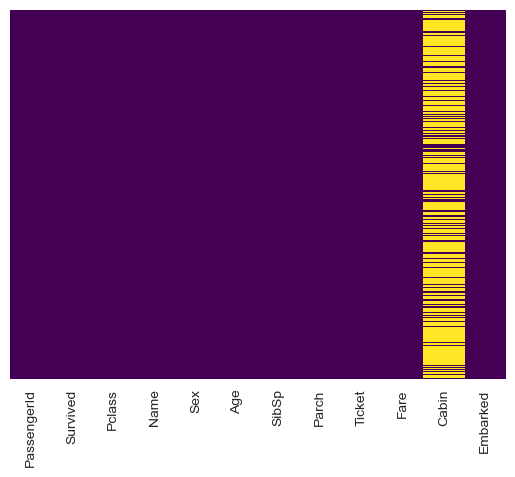

In [19]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
titanic.drop('Cabin',axis=1,inplace=True)

<Axes: >

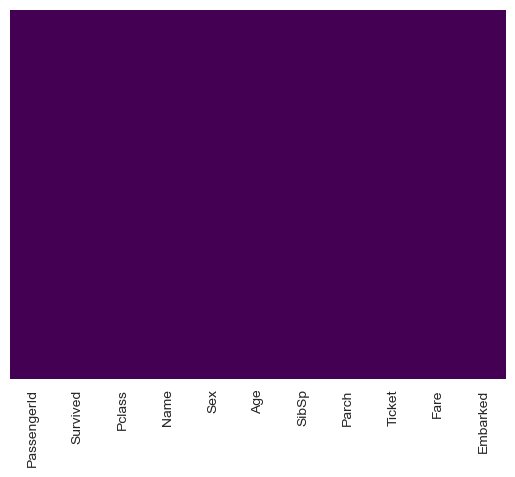

In [23]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [25]:
# descriptive analysis
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Survival count')

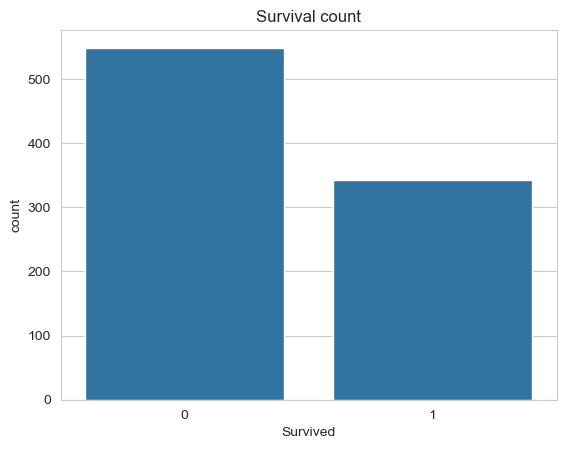

In [27]:
# univariate analysis
sns.countplot(x='Survived',data=titanic)
plt.title("Survival count")

Text(0.5, 1.0, 'Survival count by Gender')

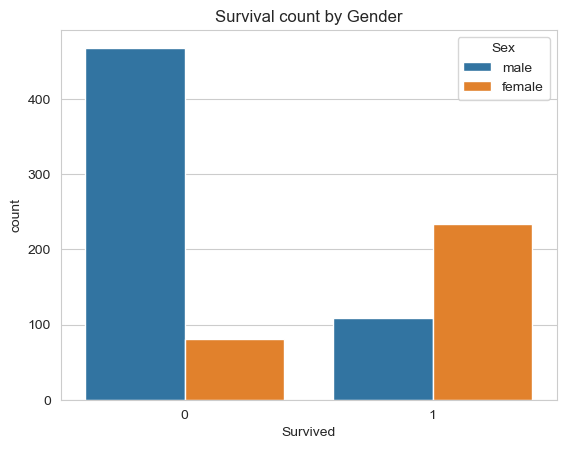

In [29]:
# bivariate analysis
# ploting survival count by gender
sns.countplot(x='Survived',hue='Sex',data=titanic)
plt.title("Survival count by Gender")

Text(0.5, 1.0, 'Survival count by Pclass')

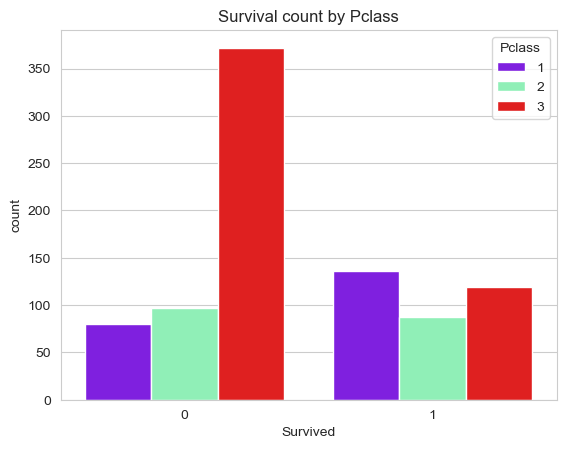

In [31]:
# ploting survival count by Passenger's class
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='rainbow')
plt.title("Survival count by Pclass")

Text(0.5, 1.0, 'fare by survival')

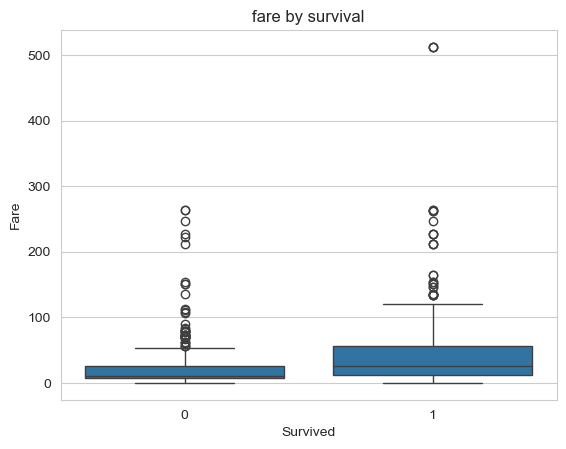

In [33]:
# Box plot for fare by survival
sns.boxplot(x="Survived",y="Fare",data=titanic)
plt.title("fare by survival")

Text(0.5, 1.0, 'Age distribution')

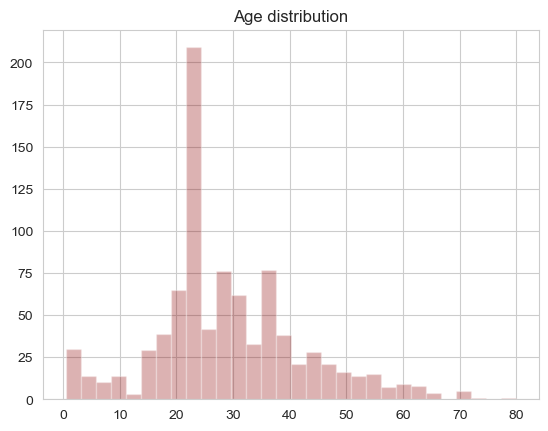

In [35]:
# ploting Age distribution 
titanic['Age'].hist(bins=30,color='darkred',alpha=0.3)
plt.title('Age distribution')

Text(0.5, 1.0, 'Sibling and spouse distribution')

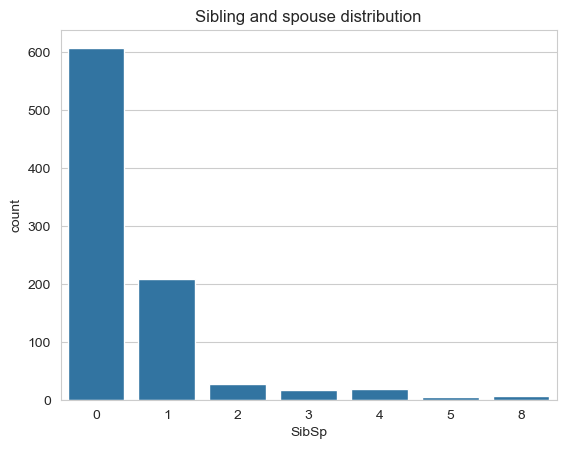

In [37]:
# ploting siblings and spouse distribution
sns.countplot(x='SibSp',data=titanic)
plt.title('Sibling and spouse distribution')

Text(0.5, 1.0, 'Survival count by class and sex')

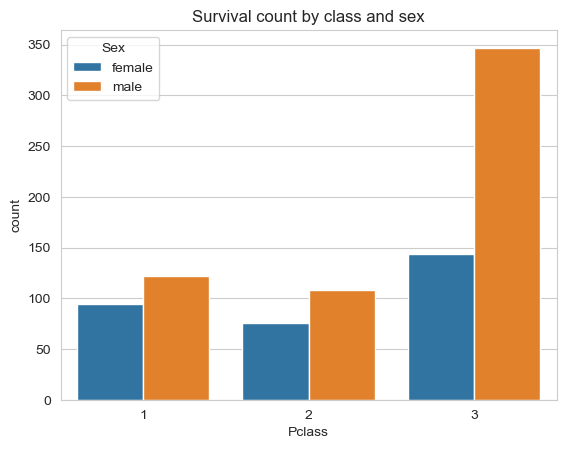

In [39]:
# multivariate analysis
# bar plot of survival by class and sex
sns.countplot(x='Pclass',hue='Sex',data=titanic)
plt.title('Survival count by class and sex')